In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from libs.pizzaiolo import Pizzaiolo
import numpy as np
from PIL import Image, ImageOps
from pprint import pp

# Initialization

In [3]:
ontology_filename = "libs/ontologies/pizzaiolo.xml"
pizzaiolo = Pizzaiolo(ontology_filename)
ontology = pizzaiolo.getOntology()

# Available Pizza Types:

In [4]:
recipes = [c.name for c in ontology.NamedPizza.subclasses()]
recipes.append('None')
for c in recipes: print(c)

American
AmericanHot
Cajun
Capricciosa
Fiorentina
FourSeasons
Giardiniera
LaReine
Mushroom
Napoletana
Parmense
Siciliana
SloppyGiuseppe
Soho
Veneziana
None


# Create Pizza

In [6]:
pizza_type = ontology.Fiorentina
generated = pizzaiolo.preparePizza(pizza_type)
pp(generated)

{'image': <PIL.Image.Image image mode=RGBA size=224x224 at 0x166E3F850>,
 'entities': {'names': {'hasTopping': ['OliveTopping',
                                       'SpinachTopping',
                                       'SlicedTomatoTopping',
                                       'GarlicTopping',
                                       'ParmesanTopping'],
                        'hasBase': 'ThinAndCrispyBase',
                        'hasCountryOfOrigin': 'Italy'},
              'counts': {'Italy': 1,
                         'ThinAndCrispyBase': 1,
                         'OliveTopping': 7,
                         'SpinachTopping': 2,
                         'SlicedTomatoTopping': 6,
                         'GarlicTopping': 3,
                         'ParmesanTopping': 1},
              'masks': {'ThinAndCrispyBase': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ...,

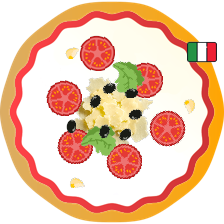

In [7]:
image = generated['image']
display(image)

In [8]:
entities = generated['entities']
pp(entities)


{'names': {'hasTopping': ['OliveTopping',
                          'SpinachTopping',
                          'SlicedTomatoTopping',
                          'GarlicTopping',
                          'ParmesanTopping'],
           'hasBase': 'ThinAndCrispyBase',
           'hasCountryOfOrigin': 'Italy'},
 'counts': {'Italy': 1,
            'ThinAndCrispyBase': 1,
            'OliveTopping': 7,
            'SpinachTopping': 2,
            'SlicedTomatoTopping': 6,
            'GarlicTopping': 3,
            'ParmesanTopping': 1},
 'masks': {'ThinAndCrispyBase': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
           'ParmesanTopping': [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       

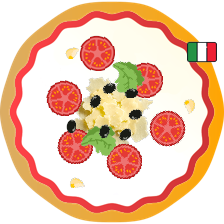

{'Italy': 1, 'ThinAndCrispyBase': 1, 'OliveTopping': 7, 'SpinachTopping': 2, 'SlicedTomatoTopping': 6, 'GarlicTopping': 3, 'ParmesanTopping': 1}


In [9]:
names, counts, masks, contours, boxes, not_supported = entities.values()
display(image)
print(counts)

In [11]:
base_name = names[ontology.hasBase.name]
pp(base_name)


'ThinAndCrispyBase'


In [12]:
toppings_names = names[ontology.hasTopping.name]
pp(toppings_names)

['OliveTopping',
 'SpinachTopping',
 'SlicedTomatoTopping',
 'GarlicTopping',
 'ParmesanTopping']


In [13]:
country_name = names[ontology.hasCountryOfOrigin.name]
pp(country_name)

'Italy'


## Boxes

### Base

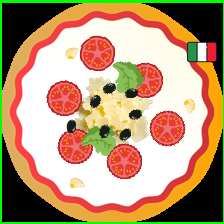

In [14]:
Pizzaiolo.drawBoxes(image, boxes[base_name], thickness=2)

### Toppings

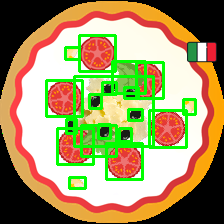

In [15]:
to_draw = []
for t in toppings_names:
    to_draw.extend(boxes[t])
Pizzaiolo.drawBoxes(image, to_draw, thickness=2)

### Country

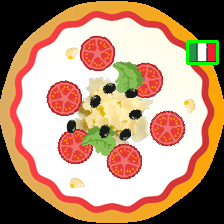

In [16]:
Pizzaiolo.drawBoxes(image, boxes[country_name], thickness=2)

### All

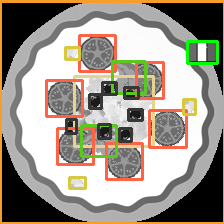

In [17]:
image_with_boxes = image.copy()
image_with_boxes = ImageOps.grayscale(image_with_boxes)
image_with_boxes = image_with_boxes.convert('RGB')
image_with_boxes = Pizzaiolo.drawAllBoxes(image_with_boxes, boxes)
image_with_boxes

## Contours

### Base

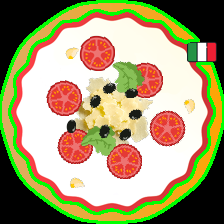

In [19]:
Pizzaiolo.drawContours(image, contours[base_name], thickness=2)

### Toppings

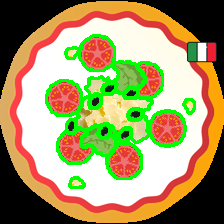

In [20]:
to_draw = []
toppings_names = names[ontology.hasTopping.name]
for t in toppings_names:
    to_draw.extend(contours[t])
Pizzaiolo.drawContours(image, to_draw, thickness=2)

### Country

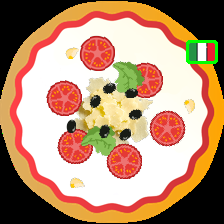

In [22]:
Pizzaiolo.drawContours(image, contours[country_name], thickness=2)

### All

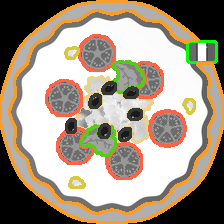

In [23]:
image_with_contours = image.copy()
image_with_contours = ImageOps.grayscale(image_with_contours)
image_with_contours = image_with_contours.convert('RGB')
image_with_contours = Pizzaiolo.drawAllContours(image_with_contours, contours, thickness=2)
image_with_contours

## Segmentation

In [24]:
segmentation = pizzaiolo.getSegmentationFromMasks(image, masks)

In [25]:
entity_ids = np.unique(segmentation)
print("Encoded entities : ", entity_ids)
for id in entity_ids:
    print("%2d : %s" % (id, pizzaiolo._getElementFromId(id)))

Encoded entities :  [ 0  2  3  4 11 16 18 22]
 0 : None
 2 : ThinAndCrispyBase
 3 : ParmesanTopping
 4 : SlicedTomatoTopping
11 : SpinachTopping
16 : OliveTopping
18 : GarlicTopping
22 : Italy


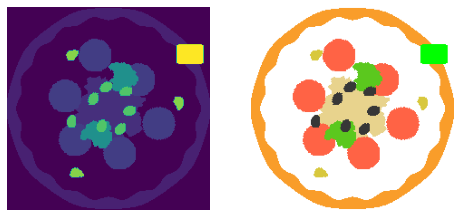

In [26]:
colored_segmentation = Image.fromarray(pizzaiolo.colorSegmentation(segmentation))
Pizzaiolo.display([segmentation, colored_segmentation], figsize=(8,5))

## Synthesis

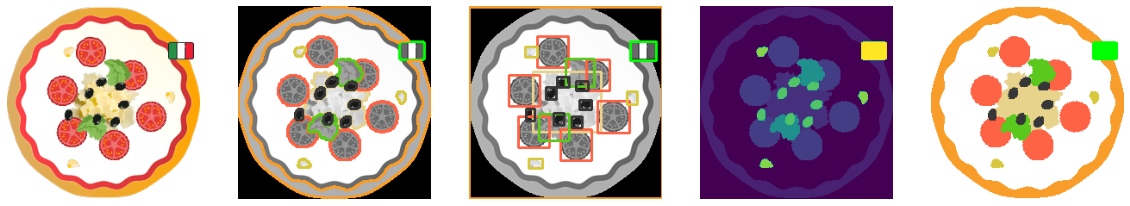

In [28]:
pizzaiolo.display([image, image_with_contours, image_with_boxes, segmentation, colored_segmentation], figsize=(20, 8))

# Pizza with Random Base

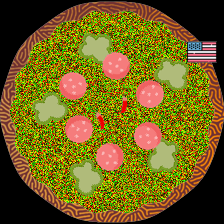

In [29]:
random_base = pizzaiolo.getRandomBase()
random_image, random_entities = pizzaiolo.preparePizza(ontology.AmericanHot, base_img=random_base).values()
display(random_image)

In [ ]:
exit()